In [37]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [38]:
strong_benchmark_file = "out/strong_scaling.json"
weak_benchmark_file = "out/weak_scaling.json"

EXCLUDE_FIRST_N = 1

In [39]:
with open(weak_benchmark_file) as f:
    weak = json.load(f)

with open(strong_benchmark_file) as f:
    strong = json.load(f)


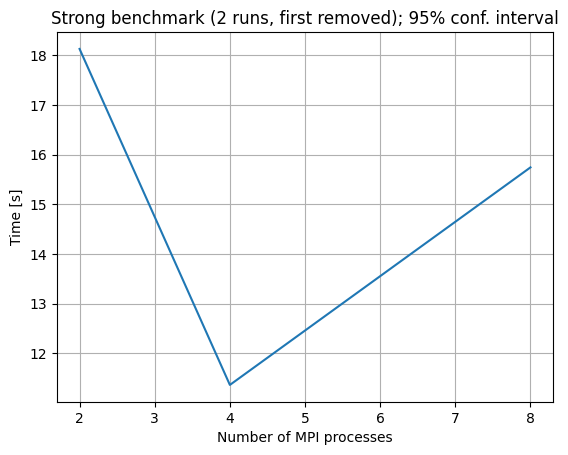

In [40]:
 # plot each threadcount as a line (different color) and each size as a point with error bars

times = []
# remove first n runs (warmup)
for t in strong["times"]:
    # print(t)
    times.append(t[EXCLUDE_FIRST_N:])

values = []
errors_y = []
processes = strong["processes"]

for t in times:
    # average
    values.append(sum(t) / len(t))
    # 95% confidence interval
    errors_y.append(1.96 * pd.Series(t).sem())      


plt.errorbar(
    processes,
    values,
    yerr=errors_y,
    capsize=4,
)

plt.xlabel("Number of MPI processes")
# plt.yscale("log")
plt.ylabel("Time [s]")
plt.grid()

plt.title(f"Strong benchmark ({strong['runs']} runs, first removed); 95% conf. interval")

plt.savefig("../../report/plots/strong_scaling.pdf")

plt.show()

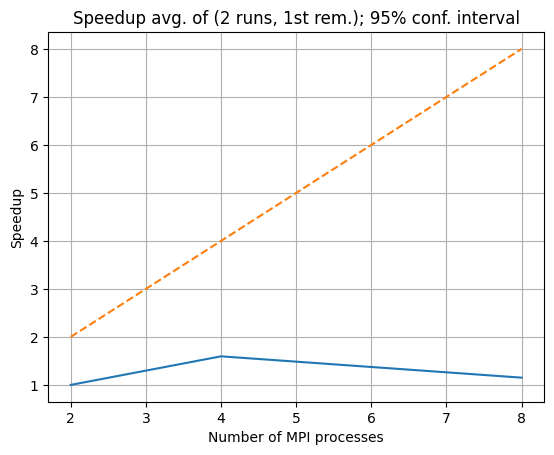

In [41]:
# plot speedup for each size


times = []

for t in strong["times"]:
    times.append(t[EXCLUDE_FIRST_N:])

values = []
errors_y = []
processes = strong["processes"]

for t in times:
    values.append(sum(t) / len(t))
    errors_y.append(1.96 * pd.Series(t).sem())

# speedup
speedup = [values[0] / v for v in values]

plt.errorbar(
    processes,
    speedup,
    yerr=errors_y,
    capsize=4,
    )

plt.plot(strong["processes"], strong["processes"], "--", label="ideal speedup")

plt.xlabel("Number of MPI processes")
plt.ylabel("Speedup")
plt.grid()

plt.title(f"Speedup avg. of ({strong['runs']} runs, 1st rem.); 95% conf. interval")

plt.savefig("../../report/plots/strong_speedup.pdf")

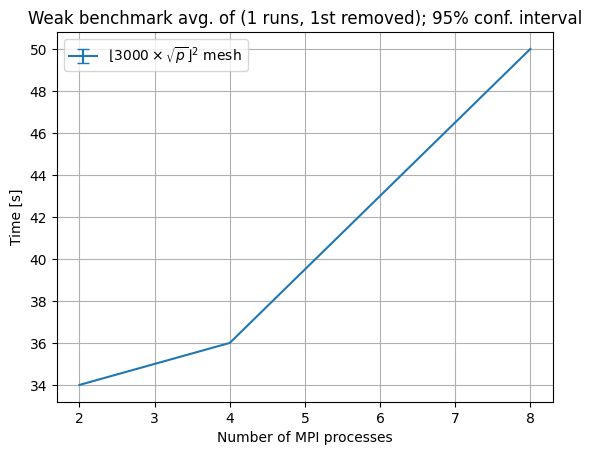

In [43]:
# weak scaling

times = []

for t in weak["times"]:
    times.append(t[EXCLUDE_FIRST_N:])

values = []
errors_y = []
processes = weak["processes"]

for t in times:
    values.append(sum(t) / len(t))
    errors_y.append(1.96 * pd.Series(t).sem())

base_size = weak["base_size"]

plt.errorbar(
    processes,
    values,
    yerr=errors_y,
    label=fr"$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor^2$ mesh",
    capsize=4,
)

plt.xlabel("Number of MPI processes")
# plt.yscale("log")
plt.ylabel("Time [s]")
plt.grid()
plt.legend()

plt.title(f"Weak benchmark avg. of ({weak['runs']} runs, 1st removed); 95% conf. interval")

plt.savefig("../../report/plots/weak_scaling.pdf")


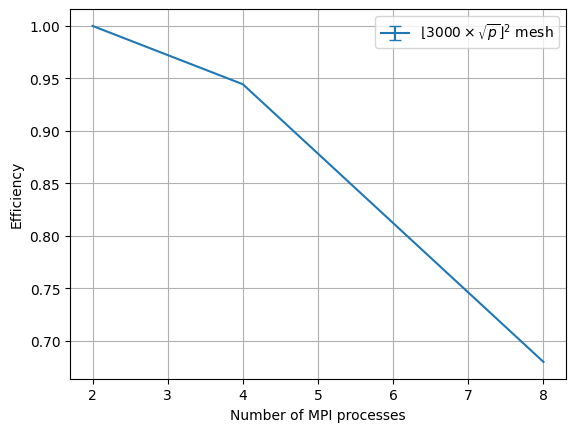

In [46]:
# plot efficiency

times = []

for t in weak["times"]:
    times.append(t[EXCLUDE_FIRST_N:])
values = []
errors_y = []
processes = weak["processes"]

for t in times:
    values.append(sum(t) / len(t))
    errors_y.append(1.96 * pd.Series(t).sem())

base_size = weak["base_size"]

plt.errorbar(
    processes,
    [values[0] / v for v in values],
    yerr=errors_y,
    label=fr"$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor^2$ mesh",
    capsize=4,
)

plt.xlabel("Number of MPI processes")
plt.ylabel("Efficiency")
plt.grid()
plt.legend()

plt.savefig("../../report/plots/weak_efficiency.pdf")